## Importing Libraries

In [1]:
import os
import math
import cv2
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import h5py
from lrfinder import LRFinder
from keras import layers
from PIL import Image, ImageOps
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
import seaborn as sns
from skimage import io

In [3]:
import keras_vggface
from keras_vggface.vggface import VGGFace

In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout

## Data Preprocessing 

### Data Augmentation

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
input_size = (224, 224)
batch_size = 64

In [8]:
training_set = train_datagen.flow_from_directory('Data/Custom/Split/augmented_train',
                                                 target_size = input_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Data/Custom/Split/augmented_validation',
                                            target_size = input_size,
                                            batch_size = batch_size,
                                            class_mode = 'categorical')


Found 1535 images belonging to 14 classes.
Found 712 images belonging to 14 classes.


## VGG19 Model

In [9]:
vgg_model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3))

2022-06-05 10:41:22.694877: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-05 10:41:22.697584: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [10]:
vgg_model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

In [11]:
x = vgg_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)

In [12]:
x = keras.layers.Dense(units = 1000,activation = tf.nn.softmax)(x)
output = keras.layers.Dense(units = 14,activation = tf.nn.softmax)(x)
vgg = keras.models.Model(inputs=vgg_model.inputs, outputs=output)

In [13]:
vgg.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
____________________________________________________________________________________________

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(vgg, to_file='Plots/vggface_model_plot.png', show_shapes=True, show_layer_names=True)

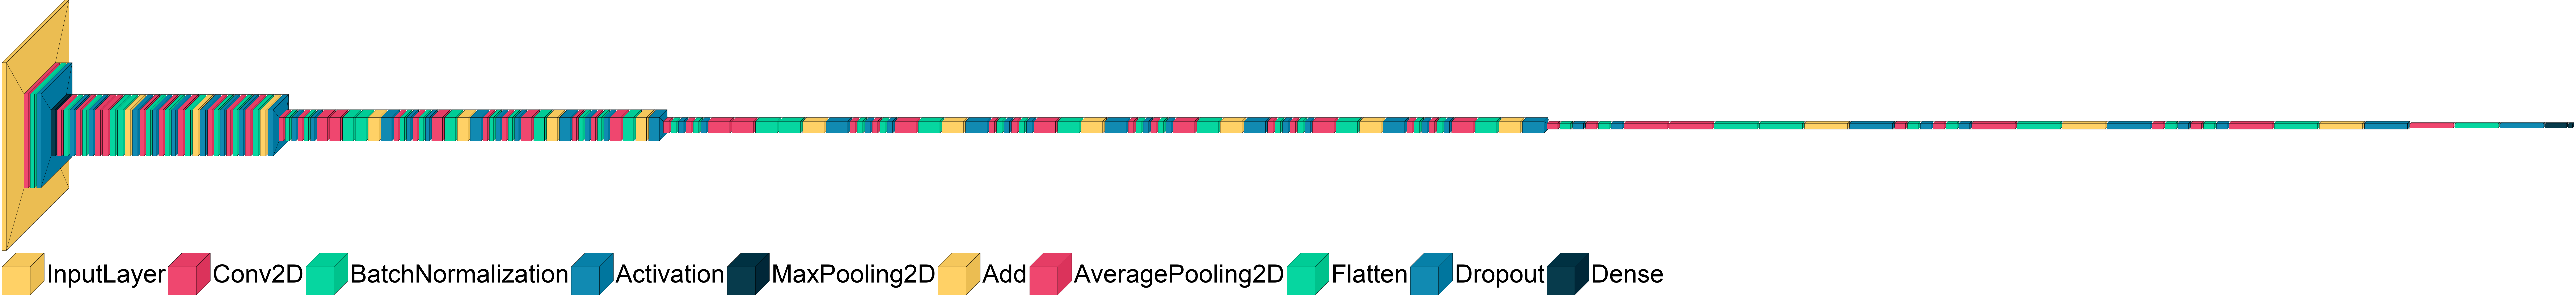

In [17]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("Fonts/arial.ttf", 120)
visualkeras.layered_view(vgg, legend=True, font = font) 

In [28]:
vgg.compile(optimizer=tf.keras.optimizers.Adam(0.00075),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

In [ ]:
history = vgg.fit(training_set, epochs = 25, validation_data = test_set)

Epoch 1/25
 4/24 [====>.........................] - ETA: 52:56 - loss: 2.6332 - accuracy: 0.1680 

In [ ]:
model.save('Models/vggface_model.h5')

In [ ]:
max(history.history['categorical_accuracy'])

In [ ]:
best_train_accuracy = history.history['categorical_accuracy'][argmin(history.history['loss'])]

In [ ]:
max(history.history['val_categorical_accuracy'])

In [ ]:
best_test_accuracy = history.history['val_categorical_accuracy'][argmin(history.history['val_loss'])]

In [ ]:
#list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()